In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

In [4]:
dataset_dir = "flowers"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50
109/109 [==============================] - 148s 1s/step - loss: 1.3853 - accuracy: 0.3853 - val_loss: 1.2326 - val_accuracy: 0.4640
Epoch 2/50
109/109 [==============================] - 85s 784ms/step - loss: 1.1957 - accuracy: 0.4900 - val_loss: 1.1396 - val_accuracy: 0.5430
Epoch 3/50
109/109 [==============================] - 85s 784ms/step - loss: 1.1307 - accuracy: 0.5291 - val_loss: 1.0827 - val_accuracy: 0.5709
Epoch 4/50
109/109 [==============================] - 65s 600ms/step - loss: 1.1167 - accuracy: 0.5337 - val_loss: 1.0649 - val_accuracy: 0.5837
Epoch 5/50
109/109 [==============================] - 33s 307ms/step - loss: 1.0745 - accuracy: 0.5618 - val_loss: 1.0632 - val_accuracy: 0.5837
Epoch 6/50
109/109 [==============================] - 33s 303ms/step - loss: 1.0476 - accuracy: 0.5887 - val_loss: 1.0252 - val_accuracy: 0.6093
Epoch 7/50
109/109 [==============================] - 34s 310ms/step - loss: 1.0130 - accuracy: 0.6014 - val_loss: 0.9819 - val_accu

In [9]:
loss, acc = model.evaluate(val_generator)
print("Validation Accuracy: {acc:.4f}")

27/27 [==============================] - 5s 189ms/step - loss: 0.7188 - accuracy: 0.7291
Validation Accuracy: {acc:.4f}


In [10]:
model.save("flower_cnn_model.h5")
print("Model saved!")

Model saved!


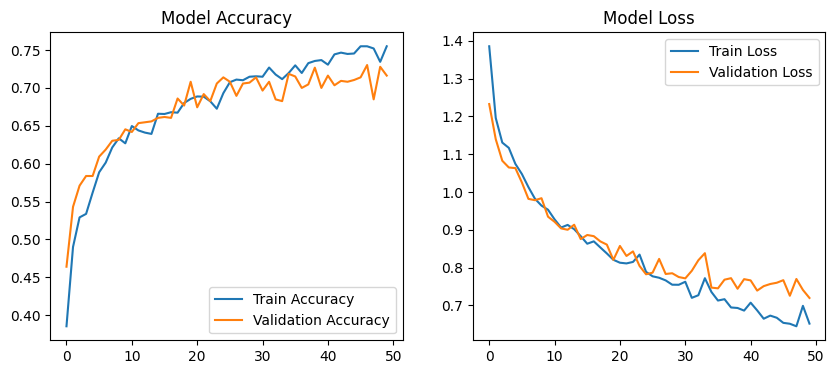

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.legend()
plt.show()